In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress all warnings 
warnings.filterwarnings("ignore")


In [135]:
train_data = pd.read_csv("./data/test.csv")

In [83]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [85]:
train_data = train_data.drop("id", axis=1)

In [86]:
train_data.shape

(36183, 11)

In [87]:
train_data.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [88]:
# drop model column
train_data = train_data.drop("model", axis=1)

In [89]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Mercedes-Benz,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,Lexus,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,Mercedes-Benz,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,Land,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,BMW,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [90]:
train_data.fuel_type.unique()

array(['Gasoline', 'E85 Flex Fuel', 'Diesel', 'Hybrid', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [91]:
# Replace '-' and notsupported values in fuel_type with 'Electric'
train_data.fuel_type.replace('–', 'Electric', inplace=True)

train_data.fuel_type.replace('not supported', 'Electric', inplace=True)

In [92]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          33033
Hybrid             1112
E85 Flex Fuel      1018
Diesel              671
Electric            201
Plug-In Hybrid      148
Name: count, dtype: int64

In [93]:
import re
# Define a function to extract engine attributes

def extract_engine_features(engine_str):
    # Extract displacement
    displacement = re.search(r"(\d+\.\d+)L", engine_str)
    engine_displacement = float(displacement.group(1)) if displacement else None

    # Extract horsepower
    horsepower = re.search(r"(\d+\.\d+)HP", engine_str)
    engine_horsepower = float(horsepower.group(1)) if horsepower else None

    # # Extract number of cylinders
    # num_cylinders = re.search(r"\d+\s?Cylinder", engine_str)
    # num_cylinders = int(num_cylinders.group().split()[0]) if num_cylinders else None

    # # Extract cylinder configuration
    # cylinder_config = "V" if "V" in engine_str else "Straight" if "Straight" in engine_str else None

    # # # Extract fuel type
    # # fuel_type = re.search(r"(Gasoline|Diesel|Electric|Flex Fuel)", engine_str)
    # # fuel_type = fuel_type.group(1) if fuel_type else None

    return engine_displacement, engine_horsepower #, num_cylinders, cylinder_config

In [94]:
# Create two new features from the engine column 
train_data[['horsepower', 'engine_displacement']] = train_data.engine.apply(extract_engine_features).apply(pd.Series)

In [95]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,engine_displacement
0,Mercedes-Benz,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,3.5,302.0
1,Lexus,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,3.5,275.0
2,Mercedes-Benz,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,2.0,241.0
3,Land,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,5.0,518.0
4,BMW,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,3.0,335.0


In [96]:
train_data.horsepower.isnull().sum()

405

In [97]:
train_data.engine_displacement.isnull().sum()

2606

In [98]:
# Replace missing horsepower and displacement values with mean
train_data.horsepower.fillna(train_data.horsepower.mean(), inplace =True)
train_data.engine_displacement.fillna(train_data.engine_displacement.mean(), inplace=True)

In [99]:
train_data.horsepower.isnull().sum()

0

In [100]:
train_data.engine_displacement.isnull().sum()

0

In [101]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,engine_displacement
0,Mercedes-Benz,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,3.5,302.0
1,Lexus,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,3.5,275.0
2,Mercedes-Benz,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,2.0,241.0
3,Land,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,5.0,518.0
4,BMW,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,3.0,335.0


In [102]:
# drop engine column 
train_data.drop("engine", axis=1, inplace=True)


In [103]:
train_data.shape

(36183, 11)

In [104]:
# Getting car age 
train_data["age"] = 2024 - train_data.model_year

In [105]:
train_data.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,engine_displacement,age
0,Mercedes-Benz,2014,73000,Gasoline,A/T,White,Beige,None reported,Yes,3.5,302.0,10
1,Lexus,2015,128032,Gasoline,8-Speed A/T,Silver,Black,None reported,Yes,3.5,275.0,9
2,Mercedes-Benz,2015,51983,Gasoline,7-Speed A/T,Blue,White,None reported,Yes,2.0,241.0,9
3,Land,2018,29500,Gasoline,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,5.0,518.0,6
4,BMW,2020,90000,Gasoline,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,3.0,335.0,4


In [106]:
# Drop model year 
train_data.drop("model_year", axis=1, inplace=True)

> INSIGHTS 

* By the end of the data wrangling process these columns were dropped (`model_year`, `engine`, `model`)
* From the `engine` column the `horsepower` and `engine_displacement` were obtained.
* Car `age` was gotten from `model_year`

In [107]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.hist(train_data.price, bins=20, color='skyblue', edgecolor = 'red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'price'

<Figure size 800x600 with 0 Axes>

 Above histogram shows the price of most cars lie in the lower range of prices



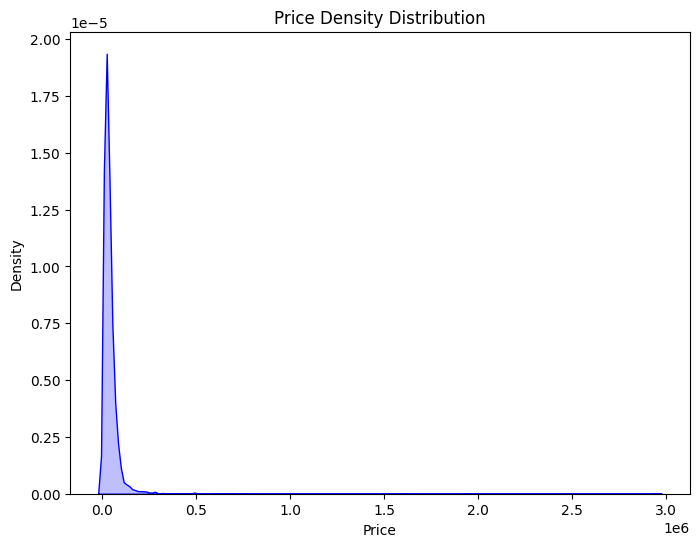

In [28]:
# plot figure to show density distribution 

plt.figure(figsize=(8, 6))
sns.kdeplot(train_data.price, color='blue', shade=True)
plt.title("Price Density Distribution")
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

The above distributions indicates a large amounts of outliers expecially above 0.5 on the price axis

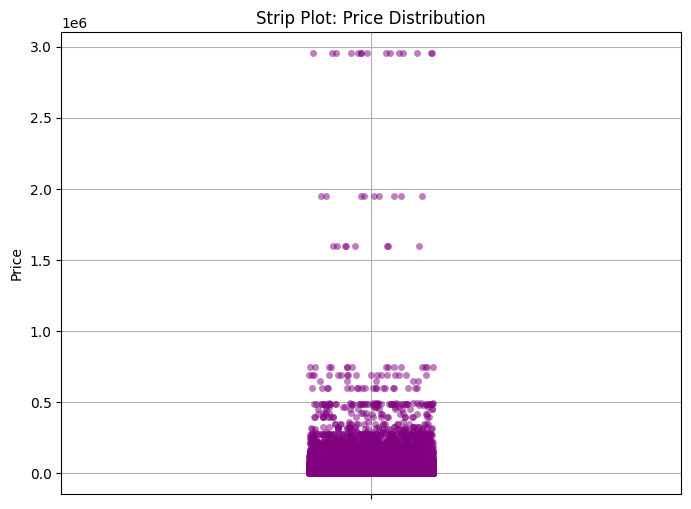

In [29]:
# Create a strip plot for the  `price` variable 
plt.figure(figsize=(8, 6))
sns.stripplot(data=train_data, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()


The strip plot above clearly shows where the outliers start to form

In [30]:
train_data.price.describe()

count    5.427300e+04
mean     3.921844e+04
std      7.282634e+04
min      2.000000e+03
25%      1.550000e+04
50%      2.800000e+04
75%      4.500000e+04
max      2.954083e+06
Name: price, dtype: float64

### Removing outliers using the IQR Method

In [31]:
Q1 = train_data.price.quantile(0.25)
Q3 = train_data.price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

29500.0


In [32]:
# Using the IQR value to filter out the outliers 
train_data = train_data[~((train_data.price < (Q1 - 1.5 * IQR)) | (train_data.price > (Q3 + 0.7 * IQR)))]
train_data.shape

(47678, 12)

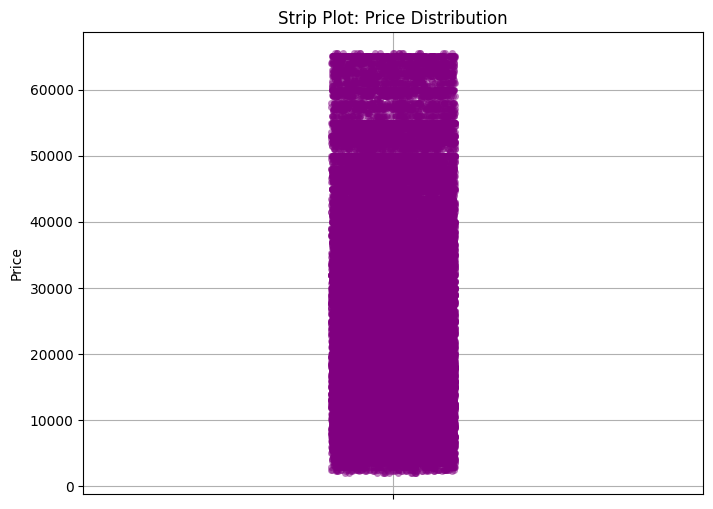

In [33]:
# Redoing the strip plot 

plt.figure(figsize=(8, 6))
sns.stripplot(data = train_data, y = 'price', jitter=True, color='purple', alpha = 0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The above strip plot shows there are no longer any outliers 

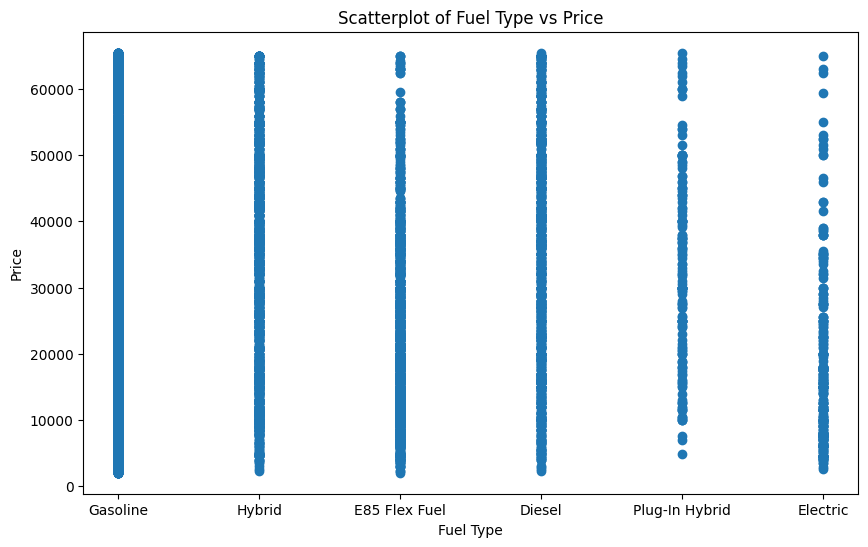

In [34]:
# Plot fuel price with respect to price 

plt.figure(figsize=(10, 6))
plt.scatter(train_data['fuel_type'], train_data['price'])
plt.title('Scatterplot of Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gasoline'),
  Text(1, 0, 'Hybrid'),
  Text(2, 0, 'E85 Flex Fuel'),
  Text(3, 0, 'Diesel'),
  Text(4, 0, 'Plug-In Hybrid'),
  Text(5, 0, 'Electric')])

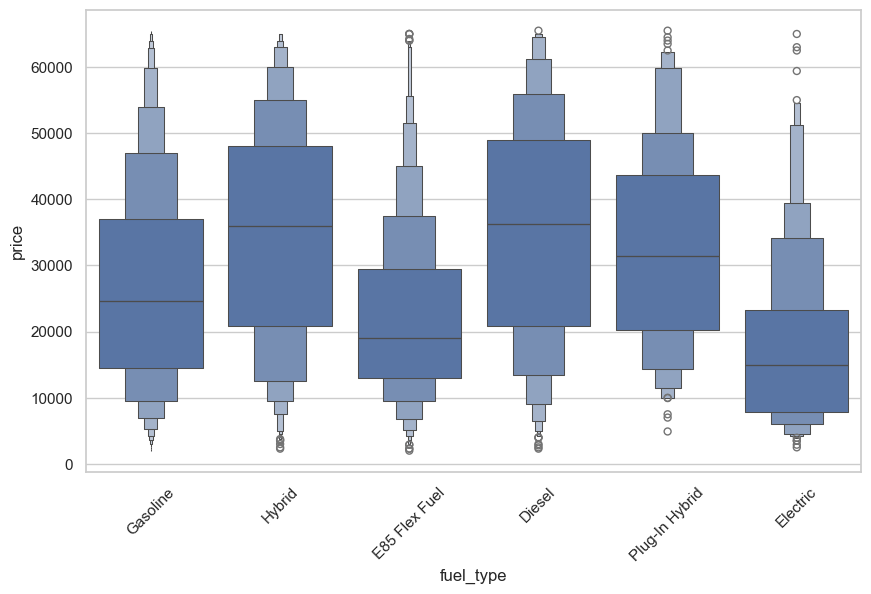

In [35]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxenplot(x = train_data.fuel_type, y=train_data.price, data= train_data)
plt.xticks(rotation = 45)


In [36]:
# Calculate Quantiles 

Q1 = train_data.price.quantile(0.25)
Q2 = train_data.price.median()
Q3 = train_data.price.quantile(0.75)

# Define a function to categorize data points into quantiles 
def categorized_quantile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"
    

In [109]:
# Apply the categorized_quatile function to the original price column 
train_data['quartile'] =  train_data.price.apply(categorized_quantile)

# Count the number of data points in each quartile 
quartile_counts = train_data.quartile.value_counts().reset_index()
quartile_counts.columns = ['quartile', 'count']
# Display Quartile distribution table
print(quartile_counts)

AttributeError: 'DataFrame' object has no attribute 'price'

In [38]:
train_data.describe()

,milage,price,horsepower,engine_displacement,age
count,47678.000000,47678.000000,47678.000000,47678.000000,47678.000000
mean,79017.969504,26943.079219,3.649098,318.030682,9.496183
std,49418.154681,15404.132778,1.314001,95.406901,5.512482
min,100.000000,2000.000000,0.650000,76.000000,0.000000
25%,42653.000000,14500.000000,2.700000,252.000000,5.000000
50%,72329.000000,24900.000000,3.500000,310.000000,8.000000
75%,108000.000000,37475.500000,4.400000,375.000000,13.000000
max,405000.000000,65500.000000,8.400000,1020.000000,50.000000


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                47678 non-null  object 
 1   milage               47678 non-null  int64  
 2   fuel_type            47678 non-null  object 
 3   transmission         47678 non-null  object 
 4   ext_col              47678 non-null  object 
 5   int_col              47678 non-null  object 
 6   accident             47678 non-null  object 
 7   clean_title          47678 non-null  object 
 8   price                47678 non-null  int64  
 9   horsepower           47678 non-null  float64
 10  engine_displacement  47678 non-null  float64
 11  age                  47678 non-null  int64  
 12  quartile             47678 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.1+ MB


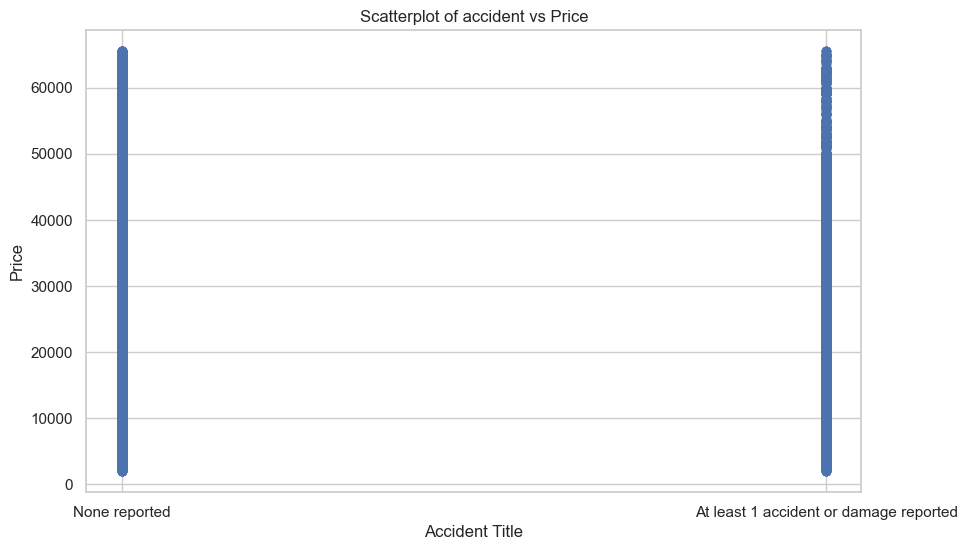

In [40]:
# Scatterplot of clean title vs price 

plt.figure(figsize=(10, 6))
plt.scatter(train_data.accident, train_data.price)
plt.title('Scatterplot of accident vs Price')
plt.xlabel('Accident Title')
plt.ylabel('Price')
plt.show()

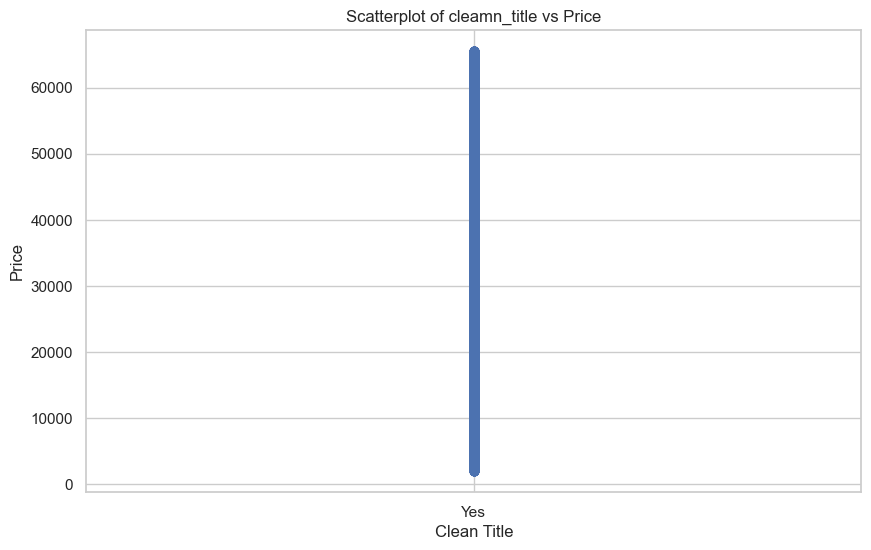

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data.clean_title, train_data.price)
plt.title('Scatterplot of cleamn_title vs Price')
plt.xlabel('Clean Title')
plt.ylabel('Price')
plt.show()

In [110]:
# from the above two scatterplots the accident and clean_title columns have no effect on the price of the cars
train_data.drop(['clean_title', 'accident'], axis=1, inplace=True)

In [111]:
train_data

,brand,milage,fuel_type,transmission,ext_col,int_col,horsepower,engine_displacement,age
0,Mercedes-Benz,73000,Gasoline,A/T,White,Beige,3.5,302.0,10
1,Lexus,128032,Gasoline,8-Speed A/T,Silver,Black,3.5,275.0,9
2,Mercedes-Benz,51983,Gasoline,7-Speed A/T,Blue,White,2.0,241.0,9
3,Land,29500,Gasoline,Transmission w/Dual Shift Mode,White,White,5.0,518.0,6
4,BMW,90000,Gasoline,8-Speed A/T,White,Black,3.0,335.0,4
...,...,...,...,...,...,...,...,...,...
36178,GMC,4500,Gasoline,10-Speed A/T,Gray,Black,6.2,420.0,5
36179,Chevrolet,185000,Gasoline,4-Speed A/T,Red,Gray,5.3,295.0,20
36180,Toyota,116000,Gasoline,5-Speed M/T,Beige,Gray,1.8,132.0,13
36181,Lincoln,39000,Gasoline,10-Speed A/T,Black,Orange,3.5,450.0,5


In [112]:
train_data.int_col.unique()

array(['Beige', 'Black', 'White', 'Gray', 'Brown', 'Blue', '–', 'Ebony',
       'Global Black', 'Grace White', 'Orange', 'Red', 'Jet Black',
       'Gold', 'Medium Light Camel', 'Canberra Beige/Black', 'Silver',
       'Rioja Red', 'Adrenaline Red', 'Charcoal', 'Black / Express Red',
       'Deep Chestnut', 'Diesel Gray / Black', 'Dark Galvanized',
       'Cocoa / Dune', 'Tan', 'Nero Ade', 'Medium Stone',
       'Ebony / Ebony Accents', 'Sandstone', 'Graphite', 'Ebony Black',
       'Green', 'Cloud', 'Charcoal Black', 'Aragon Brown', 'Brandy',
       'Black Onyx', 'Shara Beige', 'Black / Saddle', 'Deep Garnet',
       'Charles Blue', 'White / Brown', 'Mountain Brown',
       'Titan Black / Quarzit', 'Light Titanium', 'Medium Earth Gray',
       'Nero', 'Yellow', 'Light Slate', 'Portland', 'Hotspur Hide',
       'Saddle Brown', 'Black / Stone Grey', 'Kyalami Orange', 'Dark Ash',
       'Canberra Beige', 'Chestnut', 'Mistral Gray / Raven',
       'Light Platinum / Jet Black', 'Boulder', 

In [113]:
train_data.ext_col.unique()

array(['White', 'Silver', 'Blue', 'Red', 'Black', 'Gray', 'Atomic Silver',
       'Green', 'Octane Red Pearlcoat', 'Purple', 'Diamond Black',
       'Agate Black Metallic', '–', 'Orange', 'Polymetal Gray Metallic',
       'Crystal Black Pearl', 'Snowflake White Pearl', 'Jet Black Mica',
       'Black Raven', 'Black Clearcoat', 'Yellow', 'Metallic',
       'Imperial Blue Metallic', 'Phytonic Blue Metallic', 'Gold',
       'Brown', 'Sonic Silver Metallic', 'Dark Ash Metallic',
       'Matte White', 'Summit White', 'Deep Crystal Blue Mica',
       'Mosaic Black Metallic', 'Nebula Gray Pearl',
       'Silver Flare Metallic', 'Soul Red Crystal Metallic',
       'Orca Black Metallic', 'Antimatter Blue Metallic',
       'Bright White Clearcoat', 'Dark Sapphire',
       'Ebony Twilight Metallic', 'Tungsten Metallic', 'Blu',
       'Magnetic Metallic', 'Beige', 'Sting Gray Clearcoat',
       'Machine Gray Metallic', 'Rosso Mars Metallic', 'Tan',
       'Iridescent Pearl Tricoat', 'Alpine White'

In [114]:
train_data.drop(['int_col', 'ext_col'], axis=1, inplace=True)

In [115]:
train_data.describe()

,milage,horsepower,engine_displacement,age
count,36183.000000,36183.000000,36183.000000,36183.000000
mean,72479.266755,3.726671,331.915746,8.936047
std,50714.968252,1.329685,105.210400,5.589336
min,100.000000,0.650000,70.000000,0.000000
25%,31681.000000,3.000000,261.000000,5.000000
50%,65680.000000,3.500000,328.000000,8.000000
75%,102000.000000,4.600000,395.000000,12.000000
max,405000.000000,8.400000,835.000000,50.000000


In [116]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                36183 non-null  object 
 1   milage               36183 non-null  int64  
 2   fuel_type            36183 non-null  object 
 3   transmission         36183 non-null  object 
 4   horsepower           36183 non-null  float64
 5   engine_displacement  36183 non-null  float64
 6   age                  36183 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.9+ MB


### Data Grouping 

In [117]:
# create a group of transmission, fuel_type and price
train_group = train_data.groupby(['transmission', 'fuel_type'])['price'].mean().reset_index()
# Create pivot table 
train_pivot = train_group.pivot(index = 'transmission', columns= 'fuel_type', values='price')
train_data.pivot

KeyError: 'Column not found: price'

In [118]:
train_data.transmission.unique()

array(['A/T', '8-Speed A/T', '7-Speed A/T',
       'Transmission w/Dual Shift Mode', '7-Speed M/T', '4-Speed A/T',
       '8-Speed Automatic', '10-Speed Automatic', '6-Speed A/T',
       '10-Speed A/T', '6-Speed M/T', 'CVT Transmission', '9-Speed A/T',
       '5-Speed M/T', '5-Speed A/T', 'Automatic', 'Automatic CVT',
       '6-Speed Automatic', '5-Speed Automatic', 'M/T',
       '9-Speed Automatic', '7-Speed Automatic with Auto-Shift',
       '1-Speed Automatic', 'Transmission Overdrive Switch', '–',
       '8-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift', '7-Speed Automatic',
       '1-Speed A/T', '6-Speed Manual',
       '9-Speed Automatic with Auto-Shift', '8-Speed Manual',
       '4-Speed Automatic', '2', '7-Speed Manual',
       '10-Speed Automatic with Overdrive', '7-Speed',
       'SCHEDULED FOR OR IN PRODUCTION', '7-Speed DCT Automatic',
       'Manual', '2-Speed A/T', 'F', '6-Speed',
       '6-Speed Electronically Controlled Automatic with O'], 

In [119]:
train_data.isna().sum()

brand                  0
milage                 0
fuel_type              0
transmission           0
horsepower             0
engine_displacement    0
age                    0
dtype: int64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

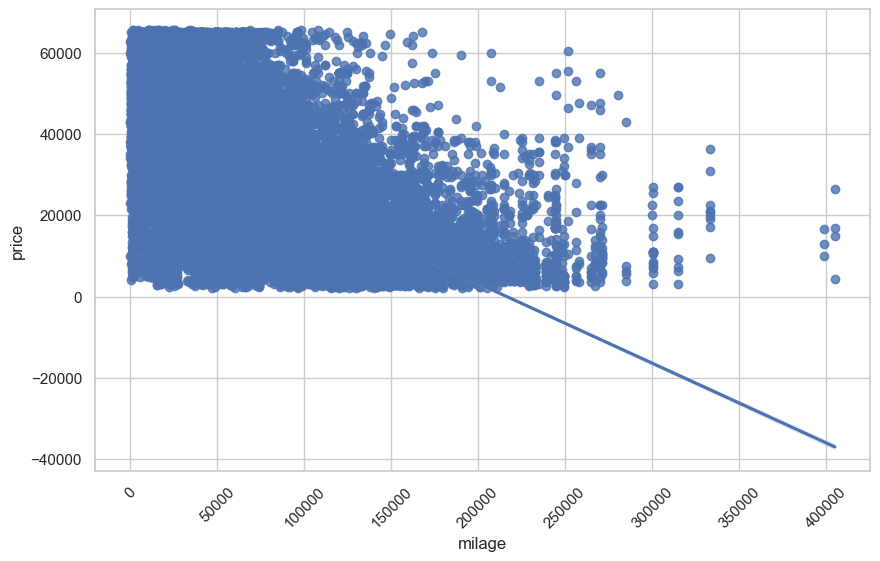

In [53]:
# Making a regression plot of milage vs price

plt.figure(figsize=(10,6))
sns.regplot(x='milage', y='price', data = train_data)
plt.xticks(rotation=45)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

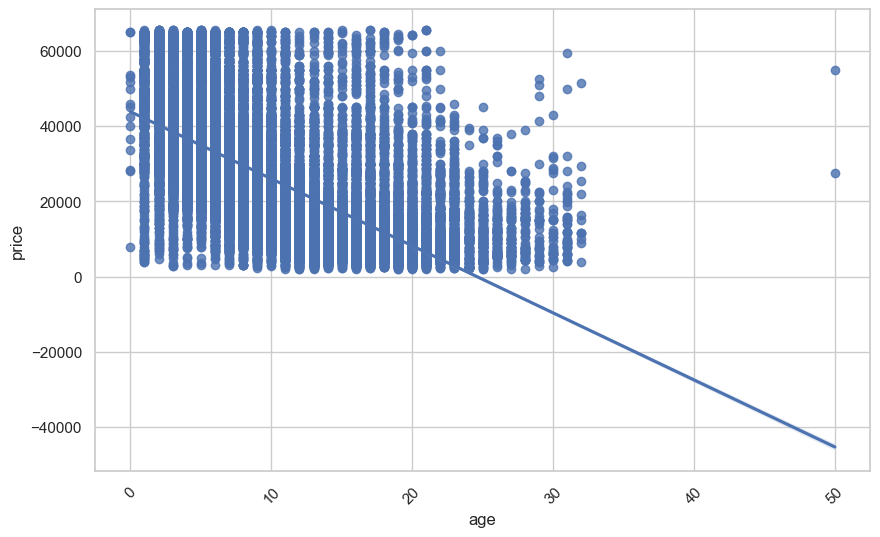

In [54]:
# making a regression plot between age and price
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y = 'price', data= train_data)
plt.xticks(rotation=45)

(array([-20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80')])

<Figure size 1000x600 with 0 Axes>

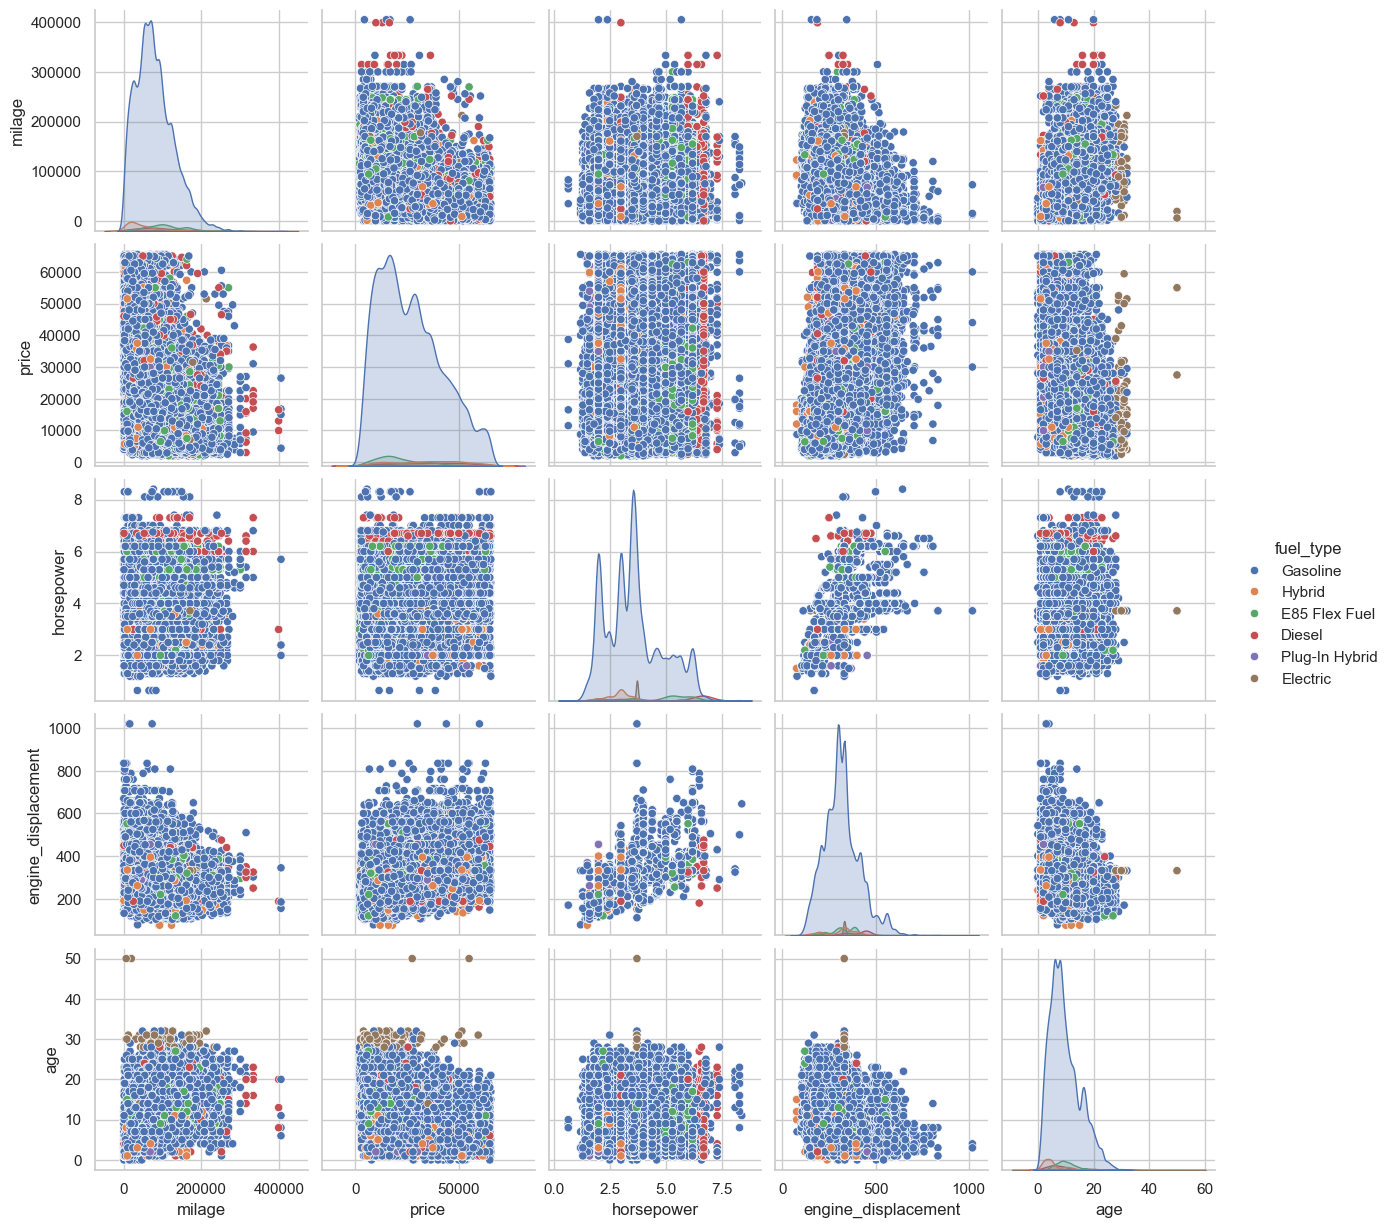

In [55]:
# Draw a pairplot of all the features in train_data except brand, transmission
plt.figure(figsize=(10, 6))
sns.pairplot(train_data, hue='fuel_type')
plt.xticks(rotation=45)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

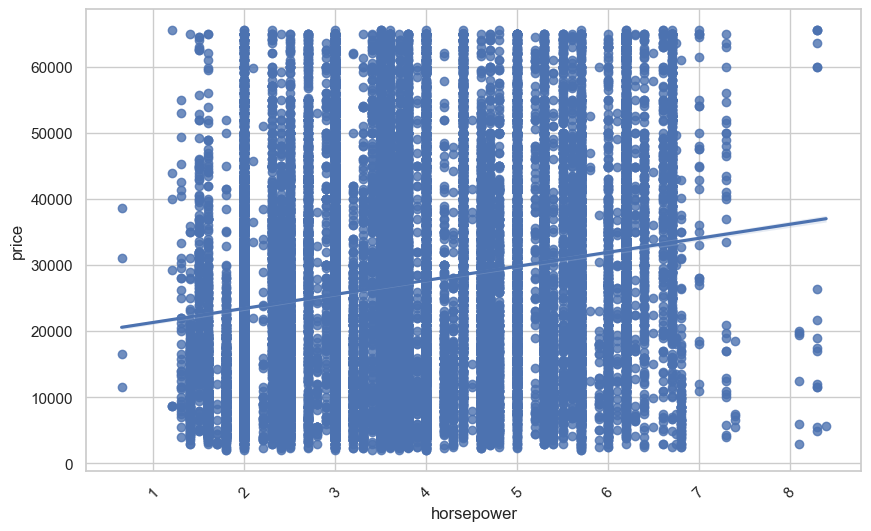

In [56]:
# Regression plot of Horsepower vs price

plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='price', data=train_data)
plt.xticks(rotation=45)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

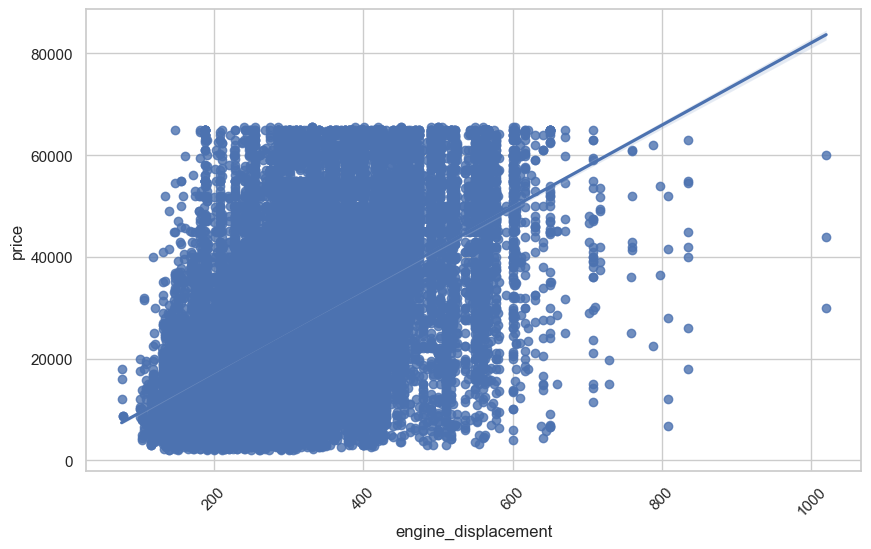

In [57]:
# Scatterplot of engine_displacement vs price
plt.figure(figsize=(10, 6))
sns.regplot(x='engine_displacement', y = 'price', data = train_data)
plt.xticks(rotation=45)

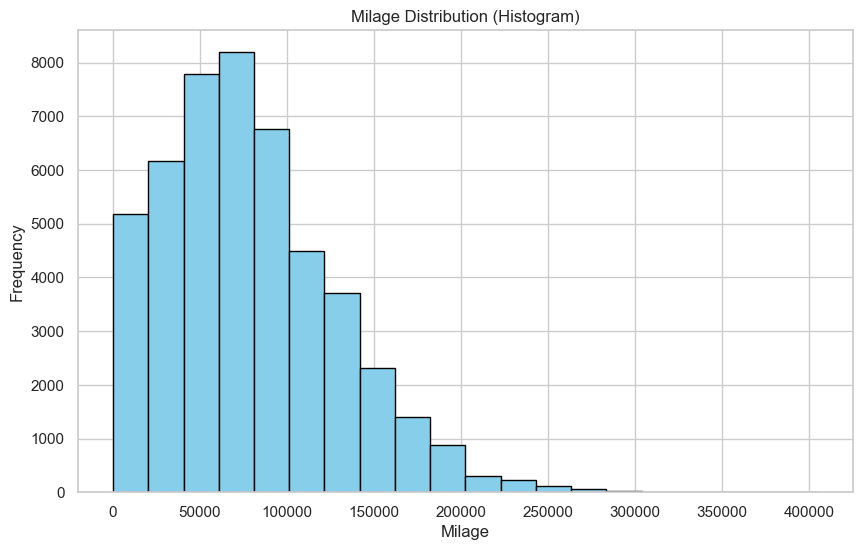

In [58]:
# Create a histogram for the milage column
plt.figure(figsize=(10, 6))
plt.hist(train_data.milage, bins=20, color='skyblue', edgecolor = 'black')
plt.title('Milage Distribution (Histogram)')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# from scipy import stats
# # To find pearson coefficient - horsepower and price
# pearson_coef, p_value = stats.pearsonr(train_data.horsepower), train_data.price

# print("The Pearson Correlation Coefficient is", pearson_coef, " with a p_value of P =", p_value)

## Model Development

In [120]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          33033
Hybrid             1112
E85 Flex Fuel      1018
Diesel              671
Electric            201
Plug-In Hybrid      148
Name: count, dtype: int64

In [ ]:
# import category encoders

from category_encoders import TargetEncoder
encoder = TargetEncoder(cols =['fuel_type'])
train_data['fuel_type_target'] = encoder.fit_transform(train_data.fuel_type, train_data.price)
train_data.head()

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
from category_encoders import TargetEncoder

# Sample data (replace with your data)
data = pd.DataFrame({'category': ['A', 'B', 'A', 'C', 'B'],
                     'target': [10, 20, 15, 25, 18]})

# Create the target encoder
encoder = TargetEncoder(cols='category', target='target')

# Encode the categorical feature
encoded_data = encoder.fit_transform(data)
print(encoded_data)

ModuleNotFoundError: No module named 'category_encoders'

In [121]:
train_cpy = train_data.copy()

In [122]:
train_data.to_csv("./data/test_data.csv")

In [123]:
train_cpy.head().T

,0,1,2,3,4
brand,Mercedes-Benz,Lexus,Mercedes-Benz,Land,BMW
milage,73000,128032,51983,29500,90000
fuel_type,Gasoline,Gasoline,Gasoline,Gasoline,Gasoline
transmission,A/T,8-Speed A/T,7-Speed A/T,Transmission w/Dual Shift Mode,8-Speed A/T
horsepower,3.5,3.5,2.0,5.0,3.0
engine_displacement,302.0,275.0,241.0,518.0,335.0
age,10,9,9,6,4


In [124]:
train_cpy.isna().sum()

brand                  0
milage                 0
fuel_type              0
transmission           0
horsepower             0
engine_displacement    0
age                    0
dtype: int64

In [125]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                36183 non-null  object 
 1   milage               36183 non-null  int64  
 2   fuel_type            36183 non-null  object 
 3   transmission         36183 non-null  object 
 4   horsepower           36183 non-null  float64
 5   engine_displacement  36183 non-null  float64
 6   age                  36183 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.9+ MB


In [126]:
for label, content in train_cpy.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        # Convert all object and string data types into categories 
        train_cpy[label] = content.astype('category').cat.as_ordered()

In [127]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   brand                36183 non-null  category
 1   milage               36183 non-null  int64   
 2   fuel_type            36183 non-null  category
 3   transmission         36183 non-null  category
 4   horsepower           36183 non-null  float64 
 5   engine_displacement  36183 non-null  float64 
 6   age                  36183 non-null  int64   
dtypes: category(3), float64(2), int64(2)
memory usage: 1.2 MB


In [128]:
# Turn categorical values into numbers 
for label, content in train_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_cpy[label] = pd.Categorical(content).codes + 1

In [129]:
train_cpy.head()

,brand,milage,fuel_type,transmission,horsepower,engine_displacement,age
0,35,73000,4,34,3.5,302.0,10
1,27,128032,4,27,3.5,275.0,9
2,35,51983,4,21,2.0,241.0,9
3,26,29500,4,43,5.0,518.0,6
4,5,90000,4,27,3.0,335.0,4


In [130]:
# split data into train and validation set 
X = train_cpy.drop("price", axis=1)
y = train_cpy.price

KeyError: "['price'] not found in axis"

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.002, random_state=42)

In [74]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47582, 7), (96, 7), (47582,), (96,))

In [ ]:
# initialising classifier models 
clf1 = RandomForestRegressor()
clf2 = LinearRegression()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

LinearRegression()

In [ ]:
clf1.score(X_val, y_val)

0.6101036585707422

In [ ]:
clf2.score(X_val, y_val)

0.5260450919870809

In [ ]:
# Setting a random seed 
np.random.seed(42)

In [ ]:
# # Doing Hyperparameter tuning

# hyper_parameters ={
#     'n_estimators': [100, 200, 300], 
#     'max_depth': [4, 8, 12],
#     'min_samples_split': [2, 5, 10], 
#     'min_samples_leaf': [1, 2, 4]
# }

In [ ]:
# # import gridsearchCV
# from sklearn.model_selection import GridSearchCV

# rf_gridsearch = RandomForestRegressor()

# grid_search = GridSearchCV(rf_gridsearch, hyper_parameters, cv=5)
# # grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 12], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# grid_search.best_params_

{'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
grid_search.best_score_

0.6555166958660998

In [75]:
rf_tuned = RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_leaf=4, min_samples_split=2)

In [ ]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, n_estimators=300)

In [ ]:
rf_tuned.score(X_val, y_val)

0.6616718516379465

In [76]:
# Trying Using a polynomial regressor model 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_tain_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Create the polynomial regressor
poly_reg = rf_tuned
# Fit the model 
poly_reg.fit(X_tain_poly, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, n_estimators=300)

In [61]:
print(poly_reg.score(X_val_poly, y_val))

NameError: name 'poly_reg' is not defined

In [ ]:
poly = {'1': 4,
        '2': 5,
        '3': 6
}

for key, value in poly.items():
    poly = PolynomialFeatures(degree=value)
    X_tain_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Create the polynomial regressor
    poly_reg = rf_tuned
    # Fit the model 
    poly_reg.fit(X_tain_poly, y_train)
    print(poly_reg.score(X_val_poly, y_val))

0.6605523933736965
0.653202667303101


In [80]:
from sklearn.metrics import mean_absolute_error
def show_scores(model, X_train, X_val):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    score = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_val, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_val, val_preds)
    }
    return score


In [81]:
show_scores(poly_reg, X_tain_poly, X_val_poly)

{'Training MAE': 5624.568165239961,
 'Valid MAE': 7235.713269339062,
 'Training R^2': 0.7567558623787224,
 'Valid R^2': 0.6577545746663507}

In [131]:
X_test = poly.transform(train_cpy)

In [133]:
results = pd.Series(poly_reg.predict(X_test))

In [134]:
results

0        20526.508008
1        17056.615635
2        24380.953691
3        48768.520892
4        32247.260485
             ...     
36178    46721.266266
36179    10381.515556
36180    11017.009252
36181    47538.379164
36182    13455.010007
Length: 36183, dtype: float64

In [136]:
id  = train_data.id

In [137]:
id 

0        54273
1        54274
2        54275
3        54276
4        54277
         ...  
36178    90451
36179    90452
36180    90453
36181    90454
36182    90455
Name: id, Length: 36183, dtype: int64

In [139]:
results_df = pd.DataFrame(id, )

In [141]:
results_df['price'] = results

In [145]:
results_df.to_csv("./submissions/1st.csv", index=False)